## 线性回归示例

- [熟悉numpy](#熟悉numpy)
- [单变量线性回归](#单变量线性回归)
- [梯度下降](#梯度下降)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

#### 熟悉numpy

In [34]:
def warmUpExercise():
    return(np.identity(5))

In [35]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 单变量线性回归

In [36]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
# np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]
print(X)
print(y)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

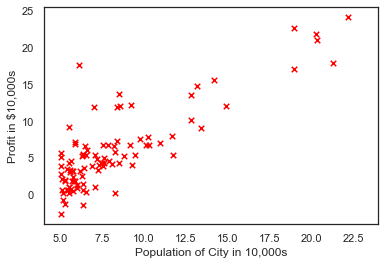

In [37]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

#### 梯度下降

In [38]:
# 计算损失函数
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [39]:
computeCost(X,y)

32.072733877455676

In [40]:
# 梯度下降
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


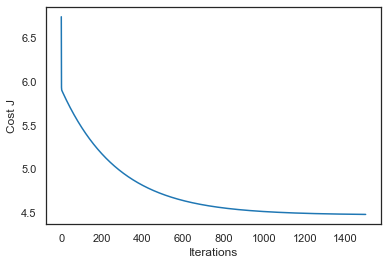

In [41]:
# 画出每一次迭代和损失函数变化
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

In [42]:
X[:,1].shape

(97,)

In [43]:
zz = X[:,1].reshape(-1,1)
print(zz.shape)

(97, 1)


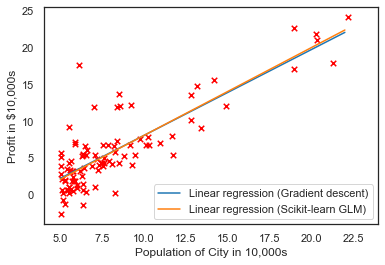

In [44]:
xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# 和Scikit-learn中的线性回归对比一下 
regr = LinearRegression()
# reshape(-1,1)将X[:,1]转化为对应的矩阵形式，ravel也转成矩阵形式
regr.fit(X[:,1].reshape(-1,1), y.ravel())
# regr.intercept_表示截距，regr.coef_表示权重参数
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [45]:
# 预测一下人口为35000和70000的城市的结果
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[4519.7678677]
[45342.45012945]


## MSE, RMSE, MAP, R^2

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import datasets

In [47]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [48]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [49]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
x = boston.data[:,5] # 只使用房间数量这个特征
y = boston.target
x.shape

(506,)

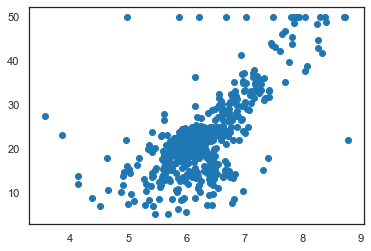

In [51]:
plt.scatter(x, y)
plt.show()

In [52]:
np.max(y)

50.0

In [53]:
x = x[y < 50.0]
y = y[y < 50.0]
x.shape

(490,)

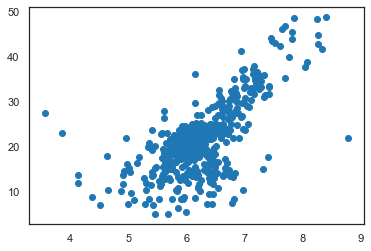

In [54]:
plt.scatter(x, y)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [56]:
x_train.shape
print(x_train)

[5.985 6.012 6.545 6.023 6.376 6.316 6.208 6.162 6.14  6.081 7.135 6.164
 5.412 6.77  6.38  5.454 5.968 5.272 5.012 5.155 6.762 7.287 5.731 6.142
 6.824 6.563 5.706 6.064 5.403 7.241 7.274 5.927 6.315 5.986 7.185 5.951
 5.942 6.153 5.949 6.546 6.398 5.456 6.425 5.926 6.579 6.826 5.837 6.242
 6.968 5.813 6.301 5.414 6.113 5.762 6.014 6.376 6.426 6.739 6.655 6.112
 5.648 5.803 6.266 6.152 6.127 6.442 6.431 6.487 6.842 6.151 5.794 5.898
 6.417 7.236 5.399 6.059 6.167 6.172 7.42  6.727 5.536 7.061 6.728 5.888
 6.145 5.856 5.709 6.333 6.417 6.728 5.933 6.8   6.438 6.595 5.885 7.47
 5.852 6.047 4.903 6.152 6.383 6.421 5.965 7.163 5.924 6.103 5.186 6.144
 6.169 6.59  5.905 5.877 6.209 6.245 5.786 6.193 7.104 5.966 6.431 6.951
 5.304 6.63  6.144 6.009 6.461 6.031 5.277 5.854 5.888 5.39  5.344 6.108
 6.565 6.096 5.594 6.852 6.229 5.747 6.854 6.75  5.627 6.229 3.863 7.645
 5.453 7.041 6.758 6.041 5.783 6.13  5.759 6.129 4.519 6.004 6.951 6.382
 7.393 6.343 6.939 6.232 4.88  6.616 6.606 6.162 6.0

In [57]:
x_test.shape

(123,)

In [58]:
reg = LinearRegression()
reg.fit(x_train.reshape(-1,1), y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

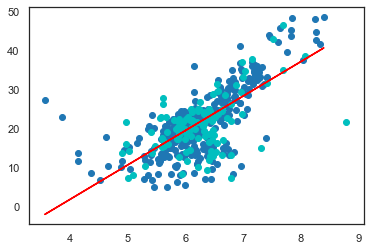

In [59]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train.reshape(-1,1)), color='r')
plt.show()

In [60]:
y_predict = reg.predict(x_test.reshape(-1, 1))

### MSE, RMSE and MAE

In [61]:
mean_squared_error(y_test, y_predict)

36.003977206973055

In [62]:
np.sqrt()

ValueError: invalid number of arguments

In [63]:
mean_absolute_error(y_test, y_predict)

4.274837066772471

### R Square

In [64]:
r2_score(y_test, y_predict)

0.23788228660273447